In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/minimalistic-v2/__results__.html
/kaggle/input/minimalistic-v2/submission.csv
/kaggle/input/minimalistic-v2/__notebook__.ipynb
/kaggle/input/minimalistic-v2/__output__.json
/kaggle/input/minimalistic-v2/ml_stratifiers.py
/kaggle/input/minimalistic-v2/custom.css
/kaggle/input/minimalistic-v2/__pycache__/ml_stratifiers.cpython-37.pyc
/kaggle/input/lish-moa/train_targets_scored.csv
/kaggle/input/lish-moa/sample_submission.csv
/kaggle/input/lish-moa/train_drug.csv
/kaggle/input/lish-moa/train_targets_nonscored.csv
/kaggle/input/lish-moa/train_features.csv
/kaggle/input/lish-moa/test_features.csv


In [2]:
import tensorflow as tf
import tensorflow_probability as tfp


device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Introduction


The genes expressions in a cell are linked to its environment, i.e. if a cell is stimulated from miscellaneous factors of it's environement then with intracellular transduction of the signal, this cell's genome is stimulated.
Of course, this is a really poor modelling of the problem, but it will help us explain the general idea and goals of this paper.

The goal is predicting the mechanism of action of molecules through records of 772 genes expressions and cell survivability markers.

In machine learning, given the data and answers of a problematic, we are trying to get its rules in order to predict further answers. In this competition, given the cellular response of a stimulus we are trying to get the "cellular rules" that implied its response, i.e we are trying to find the mechanism of action of this stimulus given the genes expressions.


### A. A stimulus implies a cellular response, thus a modulation of the genes expressions:

Let's think of the molecule we are trying to predict its MoA from as the "environment stimulus" we sent to the cell.
If the cell properly receives the stimulus then it will implies a cellular response. A cellular response we will be able to monitor through its gene expression.
This is obviously false, but let's resolve 2 little problematics:


    a) A properly received stimulus: What is it?
    
If the stimulus is not strong enough or if the cell don't have any receptor to perceive this signal, then it's trying to hear imperceptible sounds or to listen to ultrasound with human ears. The stimulus must be strong enough and needs specific organs of perception (=Receptors) to be perceived.
Thus, a cell will implies a cellular response we can monitor if the molecule is presented to the cell in a sufficient concentration and only if the cell has receptors able to "perceive" this molecule.
This idea of the receptor-molecule perception will be detailed in B.1)
Let's modelize this idea of received stimulus as a function of the stimulus s: f(s) = ReLU(r*s + r') -> r in R(0,+), r' in R-. If no receptors then r=0
We will simplify this model by defining a valid stimulus (vS) which is a properly received stimulus: f(vS) = vS


    b) Monitoring the cellular response: Why ?

The theory in this paper is: if a stimulus is received it will implies a cellular response, and we will monitor it through gene expression.
This is obviously false but we will define a valid CR (=cellular response) as a CR we can monitor through gene expression.
We will also extend the definition of a valid stimulus as a properly received stimulus that implies a valid CR (vCR).



    c) Studying the case where a stimulus can be perceived by several different receptors :

If a vS is properly perceived by several different types of receptors(different receptors implying different vCR), this means we can modelize the total of vCR as a vector.
Thus VCR will be the notation of a vector stacking vertically all vCR.


    d) Pathway: Studying the case where one specific receptor can implies several (positif or negative) CR and define what a positive or negative CR is.
    
We modelized that a receptor will implies a vCR but a vS can activate the receptor or inhibate it. Thus activating a receptor will be a positive vS and inhibating it will be a negative vS.
If we imagine a single receptor able to implies several CR, we can start speaking of pathways.
A pathway(PW) will be an internal mechanism that will implies a specific vCR. Activating or Inhibiting a PW will implies positively or negatively modulating genes expressions. 



### B. Stimulus, Cellular response, pathways and Mechanisms of Action


    1) Stimulus and Cellular response: the Molecule-Receptor perception
    
A receptor is able to perceive a molecule because of several factors (3D layout of the molecule, Electronegativity, polarity). A molecule is able to be "perceived" by several types of receptors.
Because of its 3D layout and physico-chemical properties a molecule will be able to implies a VCR.
We can imagine that studying VCR is, in a way, studying the 3D layout and physico-chemical properties of a molecule.
Then when we will try to predict MoA from data, we will try to predict this properties from the molecule.

The properties of a stimulus is what implies the molecule-receptor perception and the type of the receptor is what implies a vCR.

A vCR is implied by several positive or negative activation of intracellular PW that will implies regulation and modulation of the genes expressions. Regulation and modulation of the genes expressions being what we monitor and defining what a vCR is.

    2) Chain Reaction

The CR and PW we talk about where downstream. We went from the stimulus through the receptor, then by several pathways we finally modulate the genes expression. This was downward or downstream.

Activating a gene will implies DNA transcription, then RNA transcription into Proteins. It's a very simplified model.
This proteins could be perceived by intracellular receptors or modulate the activity of other proteins implied in a specific PW or even be itself another receptor. Thus a protein will modulate the activity of PW, i.e. activating a gene will modulate the expression of other genes.

Thus the vCR is the sum of all gene modulation implied by a chain reaction of several gene modulation.

### C. What is a CoordiNET and why ?

    1) CoordiNET?
    

    2) Why?
    
Let's imagine the gene expressions in our data as a time-series, i.e. we will have the level of expression of a first gene and after this the level of expression of a second gene modified because of the first one.
The problem of MoA will be very easy to check. Because we will find obviously high level of correlation of several following genes and we will be able to say "hey this molecule is negatively modulating this genes, those genes are implied in pro-inflammatory response, the mechanism of action of this molecule could be an inhibitor of NF-κB.


### Going farther

This MOA predictor is obviously a promising tool for High-Throughput Screening.
But I think it could be even more interesting, given a specific tissue and a specific disease, we could check the overall genes expression of those cells and then being able with several drugs to bring back the gene expression to a physiological level.
This means, instead of taking normal drugs, a specific cocktail of drugs in little concentration could bring back a degenerate homeostasis to a normal state.

# Ideas

First trained ConvNet -> We cluster by drugs structure with train_drug.csv

We freeze the convnet and train Dense layers on train_targets_scored

There is 729! permutations possible, we can't try them all! #about 10¹⁷⁷² permutations
We have to find a better way to get a good layout.

### I. First attempt : Correlation matrix
    Version: 0, 1
    Correlation matrix seems promising but highly computational! We face overfitting and it would take too much time to try fixing it.

    
### II. Compute Γ and position genes in a 27x27 or 9x9x9 matrix -- Algorithmic solution
    Matrices dimension: 27*27=9*9*9=729
    ---> We will either select the 729 best genes or compute PCA

    Let X a tensor of shape (729,1), the representation of the 729 genes vertically stacked.
    Let xᵢ, xⱼ respectively the i-th and j-th gene of X.
    Let γᵢ,ⱼ the correlation value of xᵢ, xⱼ.
    ∀i in [0:728], Γᵢ = (Σⱼ₌₀⁷²⁸|γᵢ,ⱼ|)-1
    Then get the indices that would sort the array of Γᵢs.
    
    Next idea, genes with high Γ are more likely correlated to other genes than low Γ genes.
    Thus, highly correlated genes means genes that modulate the expression of each others.
    We will put low Γ genes in the corners and borders of the matrix because they are correlated to less genes.
    
    All positions of the matrix must be ranked: A position with high rank means that it's a position where its correlation has a high influence on its neighbores
    
    The position ranks and Γ ranks will help us filling all position with genes
    
    Limitations: obviously we are badly positioning the genes because we didn't care about the correlation between each xᵢ, xⱼ
    
    
### III. Use Γ and a neural network to find the perfect coordinates of the genes in a 27x27 or 9x9x9 matrix -- CoordiNET
    Find a way to make a model trying to find the 3 dimensional layout of a set of 729 flatten features.
    Consume to much ressources and loss function was not adapted: 32 minutes per epoch with very high loss values.
    
# IV. Auto-coordinating layers + Residual blocks

## TO DO:
- Try a CNN with Residual blocks
- Try average pooling
- Try PCA
- DRUGS CLUSTERING
- Correlation matrix with only the non-zero rows

In [3]:
##################### HYPER PARAMS #####################
GENES_REGEX = '^g-*|^c-'
N_SPLITS = 7

BATCH_SIZE=128
EPOCHS=200

LEARNING_RATE = 4e-1
LABEL_SMOOTHING = 1e-5

RLR_PATIENCE = 3
RLR_FACTOR = .7
ES_PATIENCE = 20
########################################################

In [4]:
##################### HYPER PARAMS #####################
REGULARIZATION = 1

INPUT_SHAPE = 729
AUTOCOORD_L1, AUTOCOORD_L2 = 1e-3, 1e-2
AUTO_SIZE = 9**3
RESHAPE_SIZE = (9,9,9,1)
AUTO_DROPOUT = .1

CONV_FILTER = 2
RESBLOCK_L1, RESBLOCK_L2 = 1e-6, 1e-5

DENSE_L1, DENSE_L2 = 1e-4, 1e-3
DENSE_DROPOUT = .5

OUTPUT_SIZE = 206
########################################################

In [5]:
print(f'''##################### HYPER PARAMS #####################\n
      BATCH_SIZE = {BATCH_SIZE} \n
      EPOCHS = {EPOCHS}\n
      N_SPLITS = {N_SPLITS}\n
      LABEL_SMOOTHING = {LABEL_SMOOTHING}\n
      GENES_REGEX = {GENES_REGEX}\n
      RLR_PATIENCE = {RLR_PATIENCE}\n
      RLR_FACTOR = {RLR_FACTOR}\n
      ES_PATIENCE = {ES_PATIENCE}\n
########################################################
      ''')

print(f'''##################### HYPER PARAMS #####################\n
      LEARNING_RATE = {LEARNING_RATE}\n
      REGULARIZATION = {REGULARIZATION}\n
      INPUT_SHAPE = {INPUT_SHAPE}\n
      AUTOCOORD_L1, AUTOCOORD_L2 = {AUTOCOORD_L1}, {AUTOCOORD_L2}\n
      AUTO_SIZE = {AUTO_SIZE}\n
      RESHAPE_SIZE = {RESHAPE_SIZE}\n
      AUTO_DROPOUT = {AUTO_DROPOUT}\n
      CONV_FILTER = {CONV_FILTER}\n
      RESBLOCK_L1, RESBLOCK_L2 = {RESBLOCK_L1}, {RESBLOCK_L2}\n
      DENSE_L1, DENSE_L2 = {DENSE_L1}, {DENSE_L2}\n
      DENSE_DROPOUT = {DENSE_DROPOUT}\n
      OUTPUT_SIZE = {OUTPUT_SIZE}\n
########################################################
      ''')

##################### HYPER PARAMS #####################

      BATCH_SIZE = 128 

      EPOCHS = 200

      N_SPLITS = 7

      LABEL_SMOOTHING = 1e-05

      GENES_REGEX = ^g-*|^c-

      RLR_PATIENCE = 3

      RLR_FACTOR = 0.7

      ES_PATIENCE = 20

########################################################
      
##################### HYPER PARAMS #####################

      LEARNING_RATE = 0.4

      REGULARIZATION = 1

      INPUT_SHAPE = 729

      AUTOCOORD_L1, AUTOCOORD_L2 = 0.001, 0.01

      AUTO_SIZE = 729

      RESHAPE_SIZE = (9, 9, 9, 1)

      AUTO_DROPOUT = 0.1

      CONV_FILTER = 2

      RESBLOCK_L1, RESBLOCK_L2 = 1e-06, 1e-05

      DENSE_L1, DENSE_L2 = 0.0001, 0.001

      DENSE_DROPOUT = 0.5

      OUTPUT_SIZE = 206

########################################################
      


# Data showcase

In [6]:
def head(numpy_array):
    return pd.DataFrame(numpy_array)

train_features = pd.read_csv('../input/lish-moa/train_features.csv')
train_features.head()

genes = train_features.filter(regex=(GENES_REGEX)).to_numpy()
head(genes)


targets = pd.read_csv('../input/lish-moa/train_targets_scored.csv').drop(['sig_id'],axis=1).to_numpy()
head(targets)

train_features.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


# Data preprocessing

In [7]:
def cleanFeatures(features):
    features_ = features.copy()
    cp_type = {'trt_cp': 0, 'ctl_vehicle': 1}
    cp_dose = {'D1': 0, 'D2': 1}
    features_['cp_type'] = features_['cp_type'].map(cp_type)
    features_['cp_dose'] = features_['cp_dose'].map(cp_dose)
    features_ = pd.get_dummies(features_, columns=['cp_time'])
    features_.drop(['sig_id'], inplace=True, axis=1)
    return features_

X_clean = cleanFeatures(train_features)
X_clean

,cp_type,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99,cp_time_24,cp_time_48,cp_time_72
0,0,0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,...,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,0,0
1,0,0,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,...,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0,1
2,0,0,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,...,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,1,0
3,0,0,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,...,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,1,0
4,0,1,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,...,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,0,1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,...,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680,1,0,0
23810,0,1,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,...,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689,1,0,0
23811,1,1,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,...,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808,0,1,0
23812,0,0,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,...,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740,1,0,0


In [8]:
def rankGauss(x):
    from scipy.special import erfinv
    N = x.shape[0]
    temp = x.argsort(axis=-2)
    rank_x = temp.argsort(axis=-2) / N
    rank_x -= rank_x.mean()
    rank_x *= 2
    efi_x = erfinv(rank_x)
    efi_x -= efi_x.mean()
    return efi_x

In [9]:
REGEX = '^cp_*'

X = rankGauss(genes)
other_X = X_clean.filter(regex=(REGEX)).to_numpy()  #X_clean['cp_type'].to_numpy()

X.shape, other_X.shape

((23814, 872), (23814, 5))

In [10]:
# from sklearn.preprocessing import quantile_transform
# def quantileTransform(X, seed=51):
#     X_ = X.copy()
#     X_ = quantile_transform(X_, n_quantiles=100,output_distribution='normal', random_state=seed, axis=0)
#     X_ = pd.DataFrame(X_)
#     return X_
# train = quantileTransform(X_clean)
# test = quantileTransform(test)

In [11]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=729)
# pca.fit(train.append(test))
# train = pca.transform(train)
# test = pca.transform(test)

# Iterative stratification

In [12]:
from shutil import copyfile
copyfile(src = "../input/minimalistic-v2/ml_stratifiers.py", dst = "../working/ml_stratifiers.py")
from ml_stratifiers import MultilabelStratifiedKFold



def getMskfDatasetDict(X, other_X, y, n_splits=N_SPLITS, SEED=7):
    mskf = MultilabelStratifiedKFold(n_splits=n_splits, random_state=SEED, shuffle=True) # test_size=0.2
    for i, (train_idx, val_idx) in enumerate(mskf.split(X, y)):
        X_train, other_X_train, y_train = X[train_idx], other_X[train_idx], y[train_idx] # np.expand_dims(other_X[train_idx],1)
        X_val, other_X_val, y_val = X[val_idx], other_X[val_idx], y[val_idx] # np.expand_dims(other_X[val_idx],1)
        yield X_train, other_X_train, y_train, X_val, other_X_val, y_val

# Data Augmentation

Data augmentation with over- and under-correlated features

In [13]:
# def dataAugmentation(X, y, randomness=.3):
#     dim0 =X.shape[0]
#     dim1 = X.shape[1]
#     dim2 = X.shape[2]
#     dim3 = X.shape[3]
#     for i in range(dim0):
#         translation_matrix_1 = np.random.rand(dim1, dim2, dim3)    
#         translation_matrix_2 = np.random.rand(dim1, dim2, dim3) 
#         randint_matrix = np.random.randint(-1,1, (dim1, dim2, dim3))
#         X_i = X[i] + X[i]*(randomness*translation_matrix_1) + (randomness*(translation_matrix_2*randint_matrix))
#         yield X_i, y[i]

In [14]:
# ds_to_augment = tf.data.Dataset.from_tensor_slices((X_ds,targets))

# aug_ds = tf.data.Dataset.from_generator(
#     dataAugmentation, args=[ds_to_augment._tensors[0], ds_to_augment._tensors[1]],
#     output_signature=(
#         tf.TensorSpec(shape=(729,1), dtype=tf.float64),
#         tf.TensorSpec(shape=(206), dtype=tf.int64))
# ).batch(128)

# ConvNET

In [15]:
class AutoCoordBlock(tf.keras.layers.Layer):
    def __init__(self, dense_size=AUTO_SIZE):
        super(AutoCoordBlock, self).__init__()
        self.dense_size= dense_size
        self.l2 = tf.keras.regularizers.L2(l2=AUTOCOORD_L1)
        self.l1 = tf.keras.regularizers.L1(l1=AUTOCOORD_L2)
        self.dense = tf.keras.layers.Dense(self.dense_size, kernel_regularizer=self.l2 ,bias_regularizer=self.l1)
        self.batch_norm = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.ReLU()
        self.dropout = tf.keras.layers.Dropout(AUTO_DROPOUT)
        
        self.reshape= tf.keras.layers.Reshape(RESHAPE_SIZE)
    
    @tf.function
    def call(self, x, training=False):
        x = self.dense(x, training=training)
        x = self.batch_norm(x,training=training) 
        x = self.relu(x, training=training)
        x = self.reshape(x, training=training)
        x =  self.dropout(x, training=training) 
        return x


class ResBlock(tf.keras.layers.Layer):
    def __init__(self, pre_filter_size, k3_filter_size, k1_filter_size, padding='same', is_first=False):
        super(ResBlock, self).__init__()
        self.padding = padding
        self.l2 = tf.keras.regularizers.L2(l2=RESBLOCK_L1)
        self.l1 = tf.keras.regularizers.L1(l1=RESBLOCK_L2)
        self.is_first = is_first
        
        if not is_first:
            self.pre_filter_size = pre_filter_size        
            self.pre_conv = tf.keras.layers.Conv3D(self.pre_filter_size, (1,1,1), padding=self.padding, kernel_regularizer=self.l2 ,bias_regularizer=self.l1)
            self.batch_norm_pre = tf.keras.layers.BatchNormalization()
            self.relu_pre = tf.keras.layers.ReLU()

            self.k1_filter_size = k1_filter_size
            self.conv_k1 = tf.keras.layers.Conv3D(self.k1_filter_size, (5,5,5), padding=self.padding, kernel_regularizer=self.l2 ,bias_regularizer=self.l1)
            self.batch_norm_k1 = tf.keras.layers.BatchNormalization()
            self.relu_k1 = tf.keras.layers.ReLU()
        
        self.k3_filter_size = k3_filter_size
        self.conv_k3 = tf.keras.layers.Conv3D(self.k3_filter_size, (3,3,3), padding=self.padding, kernel_regularizer=self.l2 ,bias_regularizer=self.l1)     
        self.batch_norm_k3 = tf.keras.layers.BatchNormalization()       
        self.relu_k3 = tf.keras.layers.ReLU()
        
        self.concat = tf.keras.layers.Concatenate(axis=-1)
    
    @tf.function
    def call(self, x, training=False):
        if not self.is_first:
            x = self.pre_conv(x, training=training)
            x = self.batch_norm_pre(x,training=training)
            x = self.relu_pre(x, training=training)

            x_k1 = self.conv_k1(x, training=training)
            x_k1 = self.batch_norm_k1(x_k1, training=training) 
            x_k1 = self.relu_k1(x_k1, training=training)
        
        x_k3 = self.conv_k3(x, training=training)
        x_k3 = self.batch_norm_k3(x_k3,training=training)
        x_k3 = self.relu_k3(x_k3, training=training)
        
        if not self.is_first:
            x_ = self.concat([x_k3, x_k1, x])
        else: 
            x_ = self.concat([x_k3, x])
        return x_

    
class ReduceBlock(tf.keras.layers.Layer):
    def __init__(self):
        super(ReduceBlock, self).__init__()
        self.l2 = tf.keras.regularizers.L2(l2=RESBLOCK_L1)
        self.l1 = tf.keras.regularizers.L1(l1=RESBLOCK_L2)
        self.padding = 'valid'
        self.flatten = tf.keras.layers.Flatten()
        
        self.filter_size_0 = 8*CONV_FILTER
        self.conv_0 = tf.keras.layers.Conv3D(self.filter_size_0, (3,3,3), padding=self.padding, kernel_regularizer=self.l2 ,bias_regularizer=self.l1)     
        self.batch_norm_0 = tf.keras.layers.BatchNormalization()       
        self.relu_0 = tf.keras.layers.ReLU()
        
        self.filter_size_1 = 16*CONV_FILTER
        self.conv_1 = tf.keras.layers.Conv3D(self.filter_size_1, (3,3,3), padding=self.padding, kernel_regularizer=self.l2 ,bias_regularizer=self.l1)     
        self.batch_norm_1 = tf.keras.layers.BatchNormalization()       
        self.relu_1 = tf.keras.layers.ReLU()
        
        self.filter_size_2 = 32*CONV_FILTER
        self.conv_2 = tf.keras.layers.Conv3D(self.filter_size_2, (3,3,3), padding=self.padding, kernel_regularizer=self.l2 ,bias_regularizer=self.l1)     
        self.batch_norm_2 = tf.keras.layers.BatchNormalization()       
        self.relu_2 = tf.keras.layers.ReLU()
        
        self.concat = tf.keras.layers.Concatenate(axis=-1)
    
    @tf.function
    def call(self, x, training=False):
        x_ = self.flatten(x)
        x = self.conv_0(x, training = training)
        x = self.batch_norm_0(x, training = training)
        x = self.relu_0(x, training = training)
        
        x = self.conv_1(x, training = training)
        x = self.batch_norm_1(x, training = training)
        x = self.relu_1(x, training = training)
        
        x = self.conv_2(x, training = training)
        x = self.batch_norm_2(x, training = training)
        x = self.relu_2(x, training = training)
        x = self.flatten(x)
        return self.concat([x, x_])
    
    
class DenseBlock(tf.keras.layers.Layer):
    def __init__(self, dense_size=512, x_is_flat=False, dropout=DENSE_DROPOUT):
        super(DenseBlock, self).__init__()
        self.l2 = tf.keras.regularizers.L2(l2=DENSE_L1)
        self.l1 = tf.keras.regularizers.L1(l1=DENSE_L2)
        self.x_is_flat = x_is_flat
        if not x_is_flat:
            self.flatten = tf.keras.layers.Flatten()
        self.concat = tf.keras.layers.Concatenate(axis=1)
        self.dense = tf.keras.layers.Dense(dense_size, kernel_regularizer=self.l2 ,bias_regularizer=self.l1)
        self.batch_norm = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.ReLU()
        self.dropout = tf.keras.layers.Dropout(dropout)
        
    @tf.function
    def call(self, x, other_x, training=False):
        if not self.x_is_flat:
            x_ = self.concat([self.flatten(x), tf.cast(other_x, 'float')])
        else:
            x_ = self.concat([x, tf.cast(other_x, 'float')])
        x_ = self.dense(x_, training=training)
        x_ = self.batch_norm(x_,training=training) 
        x_ = self.relu(x_, training=training)
        x_ = self.dropout(x_, training=training) 
        return x_

In [16]:
class AutoCoordNet(tf.keras.Model):
    def __init__(self):
        super(AutoCoordNet, self).__init__()
        self.auto_block = AutoCoordBlock()
        self.res_block_0 = ResBlock(None, 1*CONV_FILTER, None, is_first=True)
        self.res_block_1 = ResBlock(2*CONV_FILTER, 2*CONV_FILTER, 1*CONV_FILTER)
        self.res_block_2 = ResBlock(4*CONV_FILTER, 4*CONV_FILTER, 2*CONV_FILTER)
        self.reduce_block = ReduceBlock()
        self.dense0 = DenseBlock(x_is_flat=True)
        self.dense1 = DenseBlock(dense_size=256, x_is_flat=True, dropout=DENSE_DROPOUT/2)
        self.output_layer = tf.keras.layers.Dense(OUTPUT_SIZE, activation='sigmoid')
        self.history = {'loss':[], 'val_loss':[] }
        
        self.loss_metrics = tf.keras.metrics.BinaryCrossentropy()

#     @tf.function
    def train(self, train_ds, validation_ds, epochs, reduce_lr, early_stopping):
        self.onTrainBegin(reduce_lr, early_stopping)
        for epoch in range(1,epochs+1):
            self.loss_metrics.reset_states()
            start_time = time.time()
            for step,(x_batch, other_x_batch, y_batch) in enumerate(train_ds):
                self.train_step(x_batch, other_x_batch, y_batch)
            loss = self.loss_metrics.result().numpy()
            self.history['loss'].append(loss)

            self.loss_metrics.reset_states()
            for (val_x_batch, val_other_x_batch, val_y_batch) in validation_ds:
                self.val_step(val_x_batch, val_other_x_batch, val_y_batch)
            val_loss = self.loss_metrics.result().numpy()
            self.history['val_loss'].append(val_loss)

            print(f"Epoch {epoch}/{epochs} -","loss: %.4f,"%(float(loss)),"val_loss: %.4f,"%(float(val_loss)), "time spent: %.2fs."%(time.time()-start_time))
            self.onEpochEnd(epoch, val_loss)
            
            if self.stop_training == True:
                return self.history
        return self.history
                
#     @tf.function
    def predict(self, ds):
        y = []
        for (x_batch, other_x_batch) in ds:
            logits = self(x_batch, other_x_batch, training=False)
            y.extend(logits.numpy())
        return np.array(y)
        
    @tf.function    
    def train_step(self, x, other_x, y):
        with tf.GradientTape() as tape:
            y_pred = self(x, other_x, training=True)
            loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)
        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        self.loss_metrics.update_state(y, y_pred)
    
    @tf.function
    def val_step(self, x, other_x, y):
        val_logits = self(x, other_x, training=False)
        self.loss_metrics.update_state(y, val_logits)

    
    @tf.function
    def call(self, x, other_x, training=False):
        x = self.auto_block(x, training=training)
        x = self.res_block_0(x, training=training)
        x = self.res_block_1(x, training=training)
        x = self.res_block_2(x, training=training)
        x = self.reduce_block(x, training=training)
        x = self.dense0(x, other_x, training=training)
        x = self.dense1(x, other_x, training=training)
        return self.output_layer(x, training=training)
    
    @tf.function
    def onTrainBegin(self, reduce_lr, early_stopping):
        self.reduce_lr, self.early_stopping = reduce_lr, early_stopping
        self.reduce_lr.set_model(self), self.early_stopping.set_model(self)
        self.reduce_lr.on_train_begin(), self.early_stopping.on_train_begin()
    
#     @tf.function
    def onEpochEnd(self, epoch, val_loss):
        logs = {'val_loss': val_loss}
        self.reduce_lr.on_epoch_end(epoch,logs), self.early_stopping.on_epoch_end(epoch,logs)

In [17]:
test_features = pd.read_csv('../input/lish-moa/test_features.csv')
test_genes = test_features.filter(regex=(GENES_REGEX)).to_numpy()
test_clean = cleanFeatures(test_features)
X_test = rankGauss(test_genes)
other_X_test = test_clean.filter(regex=(REGEX)).to_numpy() # REGEX = '^cp_*'
test_ds = tf.data.Dataset.from_tensor_slices((X_test, other_X_test)).batch(BATCH_SIZE)
X_test.shape, other_X_test.shape, test_ds

((3982, 872),
 (3982, 5),
 <BatchDataset shapes: ((None, 872), (None, 5)), types: (tf.float64, tf.int64)>)

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
def plotHistory(model):
    loss = model.history['loss']
    val_loss = model.history['val_loss']

    epochs = range(len(loss))
    start_epoch=10

    plt.plot(epochs[start_epoch:], loss[start_epoch:], 'r', label='Training Loss')
    plt.plot(epochs[start_epoch:], val_loss[start_epoch:], 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    model.summary()

### Best val_loss before overfitting: 0.0165 / Best val_accuracy: NA
# Total params: 606,926

In [19]:
def getInfer():
    stratified_ds_generator = getMskfDatasetDict(X, other_X, targets) 
    preds=[]   
    for X_train, other_X_train, y_train, X_val, other_X_val, y_val in stratified_ds_generator:
        train_ds = tf.data.Dataset.from_tensor_slices((X_train, other_X_train, y_train)).batch(BATCH_SIZE)
        val_ds = tf.data.Dataset.from_tensor_slices((X_val, other_X_val, y_val)).batch(BATCH_SIZE)
        model = AutoCoordNet()
        model.compile(
            loss=tf.keras.losses.BinaryCrossentropy(label_smoothing = LABEL_SMOOTHING),
            optimizer=tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum=.9)
        )
        reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
                    monitor='val_loss',
                    mode='min',
                    factor=RLR_FACTOR,
                    patience=RLR_PATIENCE,
                    verbose=2)
        early_stopping = tf.keras.callbacks.EarlyStopping(
                    monitor='val_loss',
                    mode='min',
                    patience=ES_PATIENCE,
                    restore_best_weights=True,
                    verbose=2)
        history = model.train(
            train_ds,
            val_ds,
            epochs=EPOCHS,
            reduce_lr = reduce_lr, 
            early_stopping = early_stopping
        )
        plotHistory(model)        
        pred = model.predict(test_ds)
        preds.append(pred)    
        
    infer = np.zeros((test_features.shape[0],206))
    for pred_ in preds:
        infer += pred_
    infer /= N_SPLITS
    return infer

# Prediction

Epoch 1/200 - loss: 0.0681, val_loss: 0.0373, time spent: 13.60s.
Epoch 2/200 - loss: 0.0199, val_loss: 0.0268, time spent: 3.47s.
Epoch 3/200 - loss: 0.0188, val_loss: 0.0230, time spent: 3.41s.
Epoch 4/200 - loss: 0.0182, val_loss: 0.0210, time spent: 3.42s.
Epoch 5/200 - loss: 0.0177, val_loss: 0.0200, time spent: 3.74s.
Epoch 6/200 - loss: 0.0174, val_loss: 0.0189, time spent: 3.43s.
Epoch 7/200 - loss: 0.0171, val_loss: 0.0180, time spent: 3.41s.
Epoch 8/200 - loss: 0.0169, val_loss: 0.0177, time spent: 3.43s.
Epoch 9/200 - loss: 0.0167, val_loss: 0.0169, time spent: 3.42s.
Epoch 10/200 - loss: 0.0166, val_loss: 0.0168, time spent: 3.47s.
Epoch 11/200 - loss: 0.0164, val_loss: 0.0166, time spent: 3.44s.
Epoch 12/200 - loss: 0.0163, val_loss: 0.0166, time spent: 3.44s.
Epoch 13/200 - loss: 0.0161, val_loss: 0.0161, time spent: 3.47s.
Epoch 14/200 - loss: 0.0160, val_loss: 0.0163, time spent: 3.49s.
Epoch 15/200 - loss: 0.0160, val_loss: 0.0160, time spent: 3.43s.
Epoch 16/200 - los

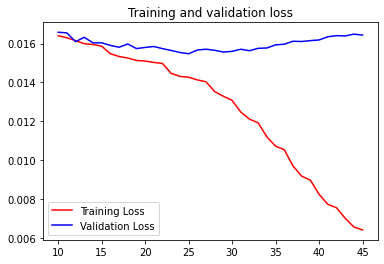

Model: "auto_coord_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
auto_coord_block (AutoCoordB multiple                  639333    
_________________________________________________________________
res_block (ResBlock)         multiple                  64        
_________________________________________________________________
res_block_1 (ResBlock)       multiple                  1494      
_________________________________________________________________
res_block_2 (ResBlock)       multiple                  5908      
_________________________________________________________________
reduce_block (ReduceBlock)   multiple                  78320     
_________________________________________________________________
dense_block (DenseBlock)     multiple                  8354816   
_________________________________________________________________
dense_block_1 (DenseBlock)   multiple               

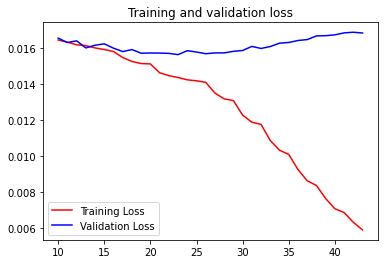

Model: "auto_coord_net_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
auto_coord_block_1 (AutoCoor multiple                  639333    
_________________________________________________________________
res_block_3 (ResBlock)       multiple                  64        
_________________________________________________________________
res_block_4 (ResBlock)       multiple                  1494      
_________________________________________________________________
res_block_5 (ResBlock)       multiple                  5908      
_________________________________________________________________
reduce_block_1 (ReduceBlock) multiple                  78320     
_________________________________________________________________
dense_block_2 (DenseBlock)   multiple                  8354816   
_________________________________________________________________
dense_block_3 (DenseBlock)   multiple             

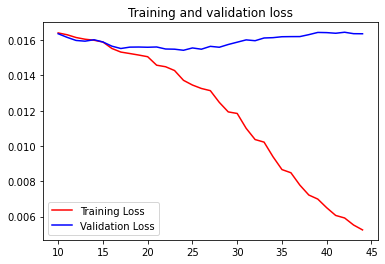

Model: "auto_coord_net_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
auto_coord_block_2 (AutoCoor multiple                  639333    
_________________________________________________________________
res_block_6 (ResBlock)       multiple                  64        
_________________________________________________________________
res_block_7 (ResBlock)       multiple                  1494      
_________________________________________________________________
res_block_8 (ResBlock)       multiple                  5908      
_________________________________________________________________
reduce_block_2 (ReduceBlock) multiple                  78320     
_________________________________________________________________
dense_block_4 (DenseBlock)   multiple                  8354816   
_________________________________________________________________
dense_block_5 (DenseBlock)   multiple             

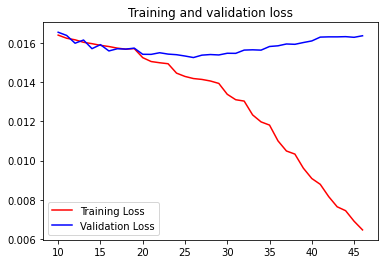

Model: "auto_coord_net_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
auto_coord_block_3 (AutoCoor multiple                  639333    
_________________________________________________________________
res_block_9 (ResBlock)       multiple                  64        
_________________________________________________________________
res_block_10 (ResBlock)      multiple                  1494      
_________________________________________________________________
res_block_11 (ResBlock)      multiple                  5908      
_________________________________________________________________
reduce_block_3 (ReduceBlock) multiple                  78320     
_________________________________________________________________
dense_block_6 (DenseBlock)   multiple                  8354816   
_________________________________________________________________
dense_block_7 (DenseBlock)   multiple             

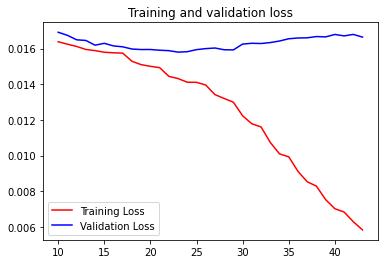

Model: "auto_coord_net_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
auto_coord_block_4 (AutoCoor multiple                  639333    
_________________________________________________________________
res_block_12 (ResBlock)      multiple                  64        
_________________________________________________________________
res_block_13 (ResBlock)      multiple                  1494      
_________________________________________________________________
res_block_14 (ResBlock)      multiple                  5908      
_________________________________________________________________
reduce_block_4 (ReduceBlock) multiple                  78320     
_________________________________________________________________
dense_block_8 (DenseBlock)   multiple                  8354816   
_________________________________________________________________
dense_block_9 (DenseBlock)   multiple             

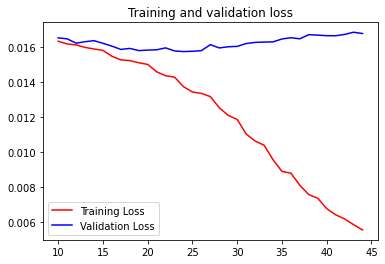

Model: "auto_coord_net_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
auto_coord_block_5 (AutoCoor multiple                  639333    
_________________________________________________________________
res_block_15 (ResBlock)      multiple                  64        
_________________________________________________________________
res_block_16 (ResBlock)      multiple                  1494      
_________________________________________________________________
res_block_17 (ResBlock)      multiple                  5908      
_________________________________________________________________
reduce_block_5 (ReduceBlock) multiple                  78320     
_________________________________________________________________
dense_block_10 (DenseBlock)  multiple                  8354816   
_________________________________________________________________
dense_block_11 (DenseBlock)  multiple             

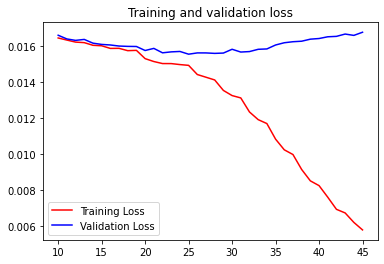

Model: "auto_coord_net_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
auto_coord_block_6 (AutoCoor multiple                  639333    
_________________________________________________________________
res_block_18 (ResBlock)      multiple                  64        
_________________________________________________________________
res_block_19 (ResBlock)      multiple                  1494      
_________________________________________________________________
res_block_20 (ResBlock)      multiple                  5908      
_________________________________________________________________
reduce_block_6 (ReduceBlock) multiple                  78320     
_________________________________________________________________
dense_block_12 (DenseBlock)  multiple                  8354816   
_________________________________________________________________
dense_block_13 (DenseBlock)  multiple             

NameError: name 'ctl_index' is not defined

In [20]:
infer = getInfer()
ctl_idx = np.where(test_features.iloc[:,1].to_numpy() == 'ctl_vehicle')
infer[ctl_index] = 0

In [21]:

sub = pd.read_csv('/kaggle/input/lish-moa/sample_submission.csv')

sub.iloc[:,1:] = infer

sub.to_csv('submission.csv', index=False)